In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_read = pd.read_csv(city_data_to_load)
ride_data_read = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data_read, city_data_read, on="city")
# Display the data table for preview
city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

True


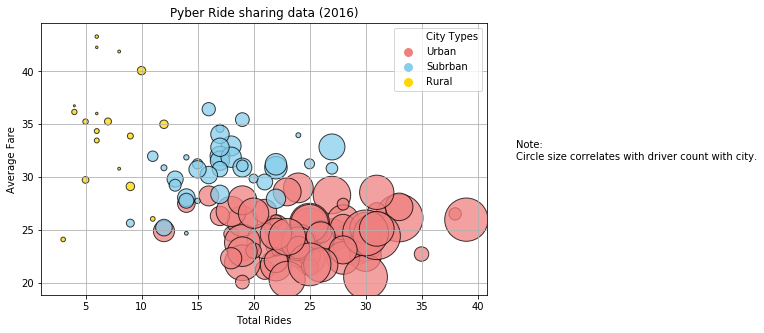

In [6]:
# Obtain the x and y coordinates for each of the three city types
city_urban = city_ride_data.loc[city_ride_data["type"] == "Urban",:]
grouped_by_city_urban = city_urban.groupby(["city"])
avg_fare_urban = grouped_by_city_urban["fare"].mean()
total_rides_urban = grouped_by_city_urban["ride_id"].count()
total_drivers_urban = grouped_by_city_urban["driver_count"].sum()

city_suburban = city_ride_data.loc[city_ride_data["type"] == "Suburban",:]
grouped_by_city_suburban = city_suburban.groupby(["city"])
avg_fare_suburban = grouped_by_city_suburban["fare"].mean()
total_rides_suburban = grouped_by_city_suburban["ride_id"].count()
total_drivers_suburban = grouped_by_city_suburban["driver_count"].sum()

city_rural = city_ride_data.loc[city_ride_data["type"] == "Rural",:]
grouped_by_city_rural = city_rural.groupby(["city"])
avg_fare_rural = grouped_by_city_rural["fare"].mean()
total_rides_rural = grouped_by_city_rural["ride_id"].count()
total_drivers_rural = grouped_by_city_rural["driver_count"].sum()

city_type_df = pd.DataFrame({"Average_fare_U":avg_fare_urban, "Total_rides_U":total_rides_urban, "Total_drivers_U":total_drivers_urban,
                             "Average_fare_S":avg_fare_suburban, "Total_rides_S":total_rides_suburban, "Total_drivers_S":total_drivers_suburban,
                             "Average_fare_R":avg_fare_rural, "Total_rides_R":total_rides_rural, "Total_drivers_R":total_drivers_rural})

# Build the scatter plots for each city types
ax1 = city_type_df.plot(kind="scatter", x="Total_rides_U", y="Average_fare_U", edgecolor="black",color = "lightcoral", grid=True, s=city_type_df["Total_drivers_U"],
                 title="Pyber Ride sharing data (2016)",alpha =0.75)

ax2 = city_type_df.plot(kind="scatter", x="Total_rides_S", y="Average_fare_S", edgecolor="black",color = "skyblue", grid=True, s=city_type_df["Total_drivers_S"],
                title="Pyber Ride sharing data (2016)",alpha =0.75, ax = ax1)

ax3 = city_type_df.plot(kind="scatter", x="Total_rides_R", y="Average_fare_R", edgecolor="black",color = "gold", grid=True, s=city_type_df["Total_drivers_R"],
                title="Pyber Ride sharing data (2016)", alpha =0.75, ax = ax1,figsize = (8,5))

# Incorporate the other graph properties
plt.xlabel("Total Rides")
plt.ylabel("Average Fare")

# Create a legend
legend_elements = [Line2D([0],[0], color='w', label = 'City Types', markersize=20),
                  Line2D([0], [1],marker='o', color='w', label='Urban',
                          markerfacecolor='lightcoral', markersize=10),
                  Line2D([0], [2], marker='o', color='w', label='Subrban',
                          markerfacecolor='skyblue', markersize=10),
                  Line2D([0], [3], marker='o', color='w', label='Rural',
                          markerfacecolor='gold', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

# Incorporate a text label regarding circle size
plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates with driver count with city.', fontdict=None)

print(ax1 == ax2 == ax3)
plt.savefig("Images/pyber_ride_sharing_data.png")
plt.show()

## Total Fares by City Type

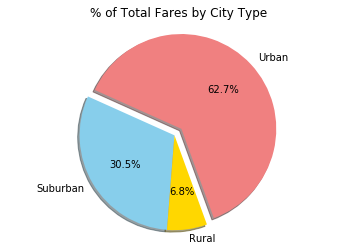

In [3]:
# Calculate Type Percents
total_fare_urban = city_urban["fare"].sum()
total_fare_suburban = city_suburban["fare"].sum()
total_fare_rural = city_rural["fare"].sum()
total_fare_by_type = [total_fare_urban,total_fare_suburban,total_fare_rural]
colors = ["lightcoral","skyblue","gold"]
labels = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
# Build Pie Chart
plt.pie(total_fare_by_type,colors=colors,shadow=True,autopct = "%1.1f%%",explode = explode, startangle = 290,labels=labels)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/pyber_fares_percents.png")
plt.show()


## Total Rides by City Type

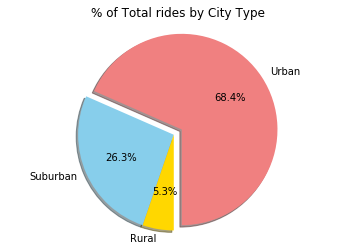

In [4]:
# Calculate Ride Percents
total_ride_urban = city_urban["ride_id"].count()
total_ride_suburban = city_suburban["ride_id"].count()
total_ride_rural = city_rural["ride_id"].count()
total_ride_by_type = [total_ride_urban,total_ride_suburban,total_ride_rural]
colors = ["lightcoral","skyblue","gold"]
labels = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
# Build Pie Chart
plt.pie(total_ride_by_type,colors=colors,shadow=True,autopct = "%1.1f%%", startangle = 270,explode = explode,labels=labels)
plt.axis("equal")
plt.title("% of Total rides by City Type")
# Save Figure
plt.savefig("Images/pyber_rides_percents.png")
plt.show()


## Total Drivers by City Type

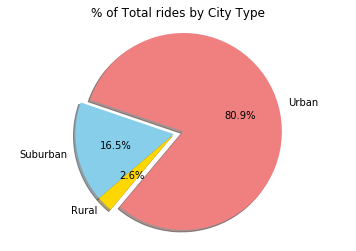

In [5]:
# Calculate Driver Percents
total_drivers_urban = grouped_by_city_urban.first()["driver_count"].sum()
total_drivers_suburban = grouped_by_city_suburban.first()["driver_count"].sum()
total_drivers_rural = grouped_by_city_rural.first()["driver_count"].sum()
total_drivers_by_type = [total_drivers_urban,total_drivers_suburban,total_drivers_rural]
colors = ["lightcoral","skyblue","gold"]
labels = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
# Build Pie Chart
plt.pie(total_drivers_by_type,colors=colors,shadow=True,autopct = "%1.1f%%", startangle = 230,explode = explode,labels=labels)
plt.axis("equal")
plt.title("% of Total rides by City Type")
# Save Figure
plt.savefig("Images/pyber_drivers_percents.png")
plt.show()

